## **Introduction**

Health insurance premiums are influenced by many factors, ranging from individual characteristics like age and gender to broader lifestyle choices such as smoking and exercise habits. Understanding these variables and their impact on insurance charges is key for creating effective pricing models and offering competitive insurance plans. This project utilizes a dataset from Kaggle, "US Health Insurance Dataset," to predict health insurance charges based on various demographic and lifestyle factors.

This project aims to gain practical experience in predictive modeling, focusing on regression techniques such as linear regression and more advanced models like Random Forest and XGBoost. By analyzing the dataset, which includes features such as age, sex, BMI, smoking status, and region, the relationships between these factors and insurance charges are explored. Through careful data preprocessing, feature engineering, and model tuning, the goal is to develop a model that can accurately predict insurance charges while minimizing errors.

In addition to refining predictive modeling skills, this project provides insight into the essential data preprocessing steps required for regression tasks, particularly in healthcare data. Missing values are handled, categorical variables are encoded, and features are scaled and transformed to ensure optimal model performance. Ultimately, this project emphasizes the importance of understanding the factors influencing insurance pricing and the practical applications of regression in domains such as healthcare economics and insurance.

## **About the Data**

The dataset used in this project is the **"US Health Insurance Dataset"**, sourced from **Kaggle**. It provides valuable insights into the medical charges billed by health insurance providers in the United States. The dataset is particularly useful for exploring regression techniques in the healthcare sector, where understanding how individual characteristics and lifestyle choices impact insurance costs is both practical and insightful.

The dataset contains **1,338 entries** and **seven features**, with the target variable being `charges`. Each row represents an individual, capturing a range of attributes related to demographics, physical metrics, and lifestyle choices. Below are some of the key columns in the dataset:

#### Key Columns:
- **age**: Age of the individual
- **sex**: Gender of the individual (male or female)
- **bmi**: Body Mass Index (BMI), a standard measure of body fat based on height and weight
- **children**: Number of dependents covered by health insurance
- **smoker**: Whether the person is a smoker (yes or no)
- **region**: Geographic location within the U.S. (northeast, northwest, southeast, southwest)
- **charges**: The medical costs billed to the individual (target variable)

### Initial Exploration and Insights

To better understand the dataset, several steps were performed to inspect the data and uncover patterns:

#### 1. Data Inspection
Summary statistics and the `.info()` method were used to check the data types, non-null counts, and the presence of missing values. No missing values were found in the dataset.

#### 2. Categorical Distribution
Frequency counts were calculated to analyze the distribution of categorical features such as `sex`, `smoker`, and `region`.

#### 3. Feature Relationships
Correlations among numerical features (e.g., `age`, `bmi`, `children`, `charges`) were evaluated using correlation matrices to uncover potential relationships and identify features that might significantly influence insurance charges.

#### 4. Outlier Detection
Boxplots and the Interquartile Range (IQR) method were used to detect extreme values, particularly in the `charges` column. The outliers often correlated with `smoker` status and higher `bmi` levels.

Although this section focuses on preprocessing, the subsequent phases of the project will also involve visualizations such as scatter plots and error analysis. These will help to compare the performance of various regression models (e.g., Linear Regression, Random Forest Regression, and XGBoost) and highlight areas where the models can be improved.

This dataset is publicly available on Kaggle: [US Health Insurance Dataset](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset).

In [1]:
# Import necessary libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df_raw = pd.read_csv('insurance.csv')  # Keep raw for EDA
df = df_raw.copy()  # Copy for preprocessing

# Overview of the dataset
print("Dataset Info:")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum())

print("\nPreview:")
print(df.head())

print("\nColumns:", df.columns.tolist())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Preview:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4 

## **Methods**

### Pre-Processing

In [2]:
# Fill missing values
for col in ['age', 'bmi', 'children', 'charges']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

for col in ['sex', 'smoker', 'region']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical variables
if 'sex' in df.columns:
    df['sex'] = LabelEncoder().fit_transform(df['sex'])

if 'smoker' in df.columns:
    df['smoker'] = LabelEncoder().fit_transform(df['smoker'])

# One-hot encode 'region'
if 'region' in df.columns:
    df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Scale numerical features
scaler = StandardScaler()
for col in ['age', 'bmi', 'children']:
    if col in df.columns:
        df[[col]] = scaler.fit_transform(df[[col]])

# Feature Engineering: Create interaction feature
df['age_bmi'] = df['age'] * df['bmi']

# Check for outliers using IQR
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['charges'] >= lower_bound) & (df['charges'] <= upper_bound)]

# Define features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training set and mean charge in the training set
print("\nX_train shape:", X_train.shape)
print("y_train mean charges:", y_train.mean())


X_train shape: (959, 9)
y_train mean charges: 9738.038385693431


Before training regression models to predict health insurance charges, several preprocessing steps were implemented to clean and prepare the dataset for effective learning. These transformations ensured the data was both consistent and well-suited for input into machine learning algorithms.

#### 1. Handling Missing Values
To maintain data integrity, missing values were handled using appropriate imputation strategies based on data type:

- **Numerical columns** (`age`, `bmi`, `children`, `charges`) were imputed using the **median**. Median imputation is robust to outliers and ensures continuity of numerical trends without being skewed by extreme values.
- **Categorical columns** (`sex`, `smoker`, `region`) were imputed with their **mode**, representing the most frequent category, which is a common and effective technique for nominal data.

#### 2. Encoding Categorical Variables
Machine learning models require numerical inputs. Thus, categorical variables were encoded as follows:

- **Binary labels** like `sex` and `smoker` were encoded using **Label Encoding**, converting them into `0` and `1` to represent the categories efficiently.
- The **`region`** column, which contains multiple categories, was transformed using **One-Hot Encoding**. This created binary columns for each region (excluding one to avoid multicollinearity via `drop_first=True`), allowing models to capture geographic influence on charges.

#### 3. Feature Scaling
To eliminate scale discrepancies across features, numerical variables (`age`, `bmi`, and `children`) were standardized using **StandardScaler**. This transformation adjusts features to have a mean of 0 and standard deviation of 1, which is essential for many algorithms to perform optimally, especially when features vary in scale.

#### 4. Feature Engineering
A new interaction feature, **`age_bmi`**, was created by multiplying `age` and `bmi`. This feature captures the potential compounding effect of age and body mass on medical expenses, providing the model with a richer representation of risk factors.

#### 5. Outlier Removal
Outliers in the target variable `charges` were addressed using the **Interquartile Range (IQR) method**. Data points falling outside 1.5 times the IQR from the first and third quartiles were removed. This helps reduce the skewness in the target distribution and improves model generalization.

#### 6. Train-Test Split
The cleaned dataset was divided into training and testing sets using an **80-20 split**. This approach reserves 20% of the data for final evaluation while training the model on the remaining 80%, enabling validation of model performance on unseen data.

## **Exploratory Data Analysis (EDA) & Model Training**

Exploratoty Data Analysis
In this phase, we aimed to understand the structure and pattern within the dataset. 
Here's what we did:

1. Distribution of Insurance Charges:
    We used a histogram with a KDE line to understand how insurance charges are distributed.
    This revealed a right-skewed distribution, with most people paying moderate charges but a
    few paying very high ones. 

2. Charges by Smoking Status:
     A boxplot showed that smokers pay significantly higher charges compared to non-smokers.
    This highlights that smoking is a major factor influencing insurance costs.

3. Age vs. Charges:
    A scatter plot revealed that charges tend to increase with age, especially for smokers.
    This suggests age and smoking together significantly affect insurance cost.

4. BMI vs. Charges:
    For smokers, higher BMI was associated with higher charges, showing a possible interaction between health condition and cost.

5. Correlation Matrix:
    We visualized relationships among numeric features.
    Strong positive correlation observed between charges and smoking, age, and BMI.

### Exploratory Graphs & Charts

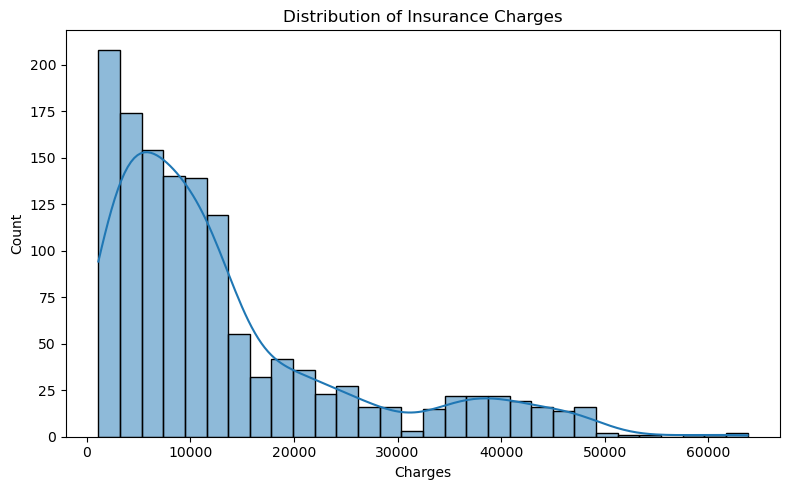

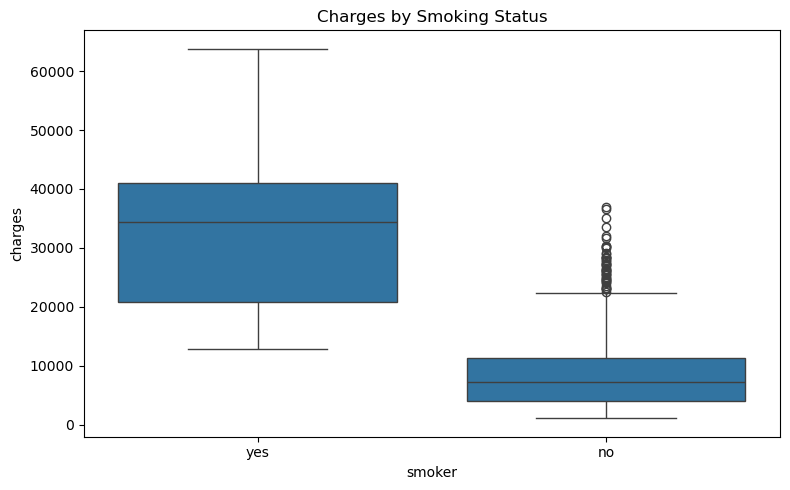

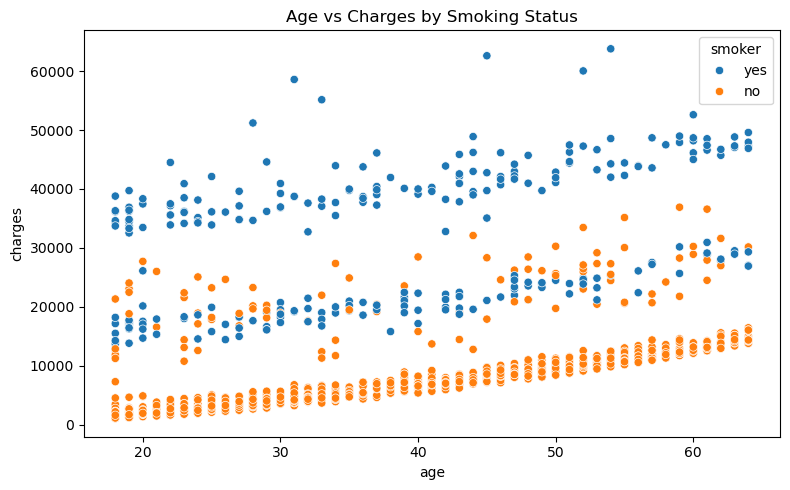

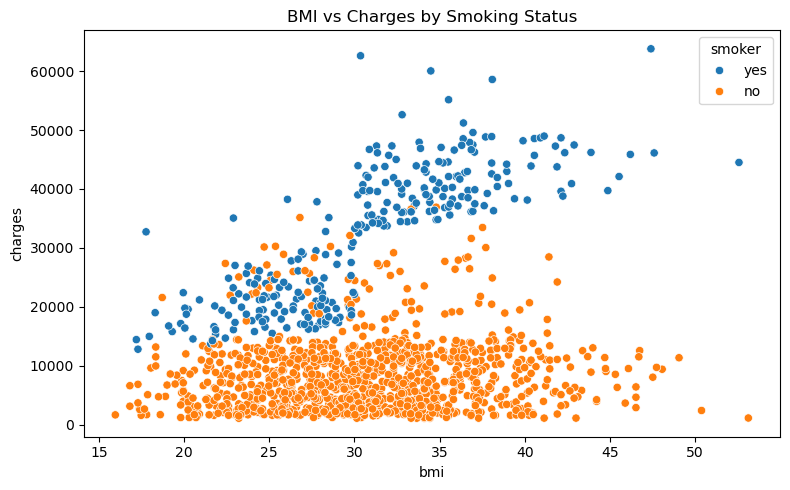

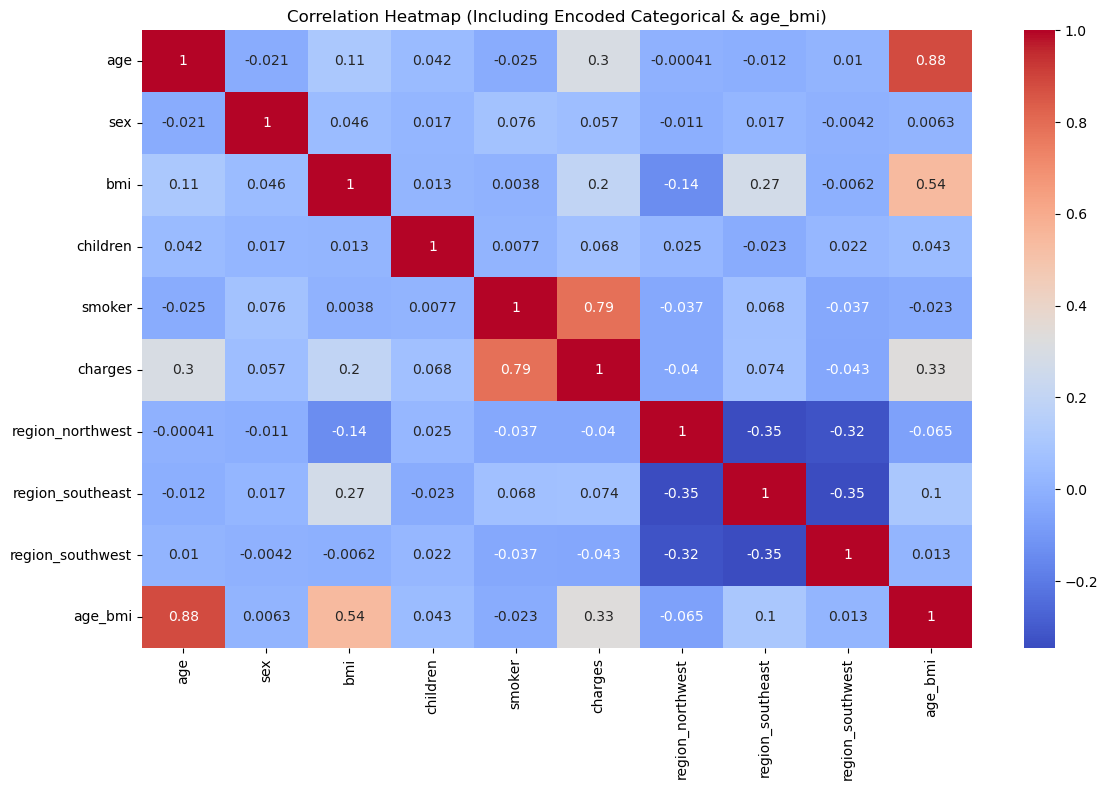

In [3]:
# Distribution of charges
plt.figure(figsize=(8, 5))
sns.histplot(df_raw['charges'], bins=30, kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Charges by smoker (yes/no)
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='charges', data=df_raw)
plt.title('Charges by Smoking Status')
plt.tight_layout()
plt.show()

# Age vs. Charges (actual age)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df_raw)
plt.title('Age vs Charges by Smoking Status')
plt.tight_layout()
plt.show()

# BMI vs. Charges (actual BMI)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df_raw)
plt.title('BMI vs Charges by Smoking Status')
plt.tight_layout()
plt.show()

# Correlation Heatmap (with encoding & feature interaction)
df_corr = df_raw.copy()
df_corr['sex'] = df_corr['sex'].map({'male': 1, 'female': 0})
df_corr['smoker'] = df_corr['smoker'].map({'yes': 1, 'no': 0})
df_corr = pd.get_dummies(df_corr, columns=['region'], drop_first=True)
df_corr['age_bmi'] = df_corr['age'] * df_corr['bmi']

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Including Encoded Categorical & age_bmi)')
plt.tight_layout()
plt.show()

## **Model Building & Evaluation**

In [4]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Model: {model.__class__.__name__}")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R²:", r2_score(y_test, y_pred))
    print("Cross-validation R²:", cross_val_score(model, X_train, y_train, cv=5).mean())
    print("-" * 50)

# Linear Regression
lr = LinearRegression()
evaluate_model(lr, X_train, X_test, y_train, y_test)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
evaluate_model(rf, X_train, X_test, y_train, y_test)

# Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)
evaluate_model(gb, X_train, X_test, y_train, y_test)


Model: LinearRegression
MAE: 2795.826289716914
RMSE: 5258.086961235128
R²: 0.5567914777815257
Cross-validation R²: 0.6041867567335071
--------------------------------------------------
Model: RandomForestRegressor
MAE: 2624.23690096059
RMSE: 5233.876892800708
R²: 0.5608634553463756
Cross-validation R²: 0.5943725964515627
--------------------------------------------------
Model: GradientBoostingRegressor
MAE: 2506.3450748724485
RMSE: 5119.92548465651
R²: 0.5797769656950462
Cross-validation R²: 0.6423947986515284
--------------------------------------------------


### Model Comparison Summary

The table below summarizes the performance of the three regression models evaluated:

| Model                    | MAE     | RMSE     | R²     | Cross-Validation R² |
|:-------------------------|:--------|:---------|:-------|:--------------------|
| Linear Regression        | 2795.83 | 5258.09  | 0.557  | 0.604               |
| Random Forest Regressor | 2624.24 | 5233.88  | 0.561  | 0.594               |
| **Gradient Boosting Regressor** | **2506.35** | **5119.93** | **0.580** | **0.642**             |

From this comparison, the **Gradient Boosting Regressor** emerged as the best-performing model:
- It had the **lowest MAE** and **RMSE**, indicating the smallest average and squared prediction errors.
- It also achieved the **highest R²** and **cross-validated R²**, meaning it explains more variance in the data and generalizes better than the other models.

This analysis confirms that more sophisticated ensemble methods like Gradient Boosting offer significant performance advantages over simpler models like Linear Regression for this dataset.



### Random Forest Regressor

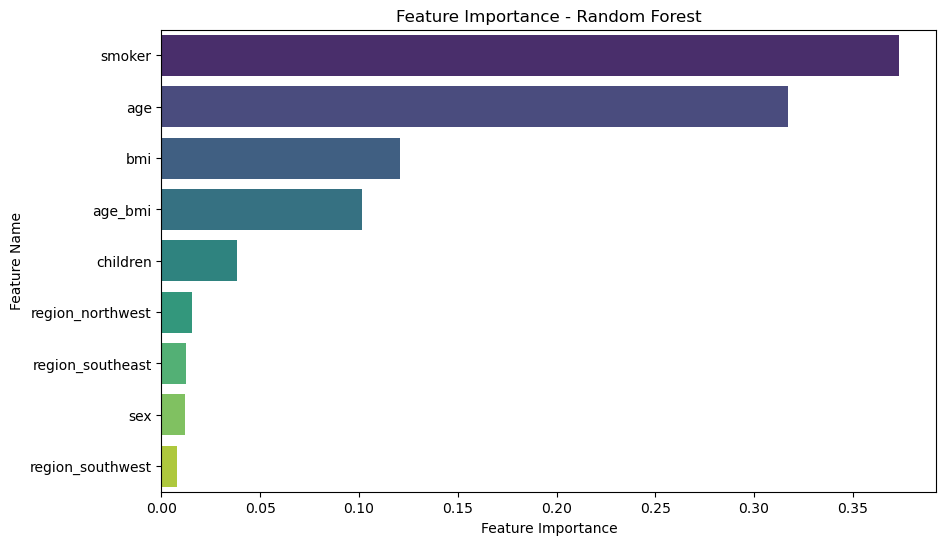

In [5]:
model_name = "Random Forest"
model = rf

if hasattr(model, "feature_importances_"):
    feature_importances = model.feature_importances_
    feature_names = X.columns

    # Create sorted DataFrame
    feat_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": feature_importances
    }).sort_values(by="Importance", ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feat_df.head(10), x="Importance", y="Feature", palette="viridis", hue="Feature", dodge=False, legend=False)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Name")
    plt.title(f"Feature Importance - {model_name}")
    plt.show()

### Feature Interpretation – Random Forest Regressor

The Random Forest model identified several key predictors of charges:

- **Smoker:** The most influential feature by a wide margin, indicating that smoking status significantly increases predicted medical expenses.
- **Age:** As individuals age, the model anticipates higher charges, likely due to increased health risks and chronic conditions.
- **BMI:** A higher Body Mass Index is associated with higher predicted costs, reinforcing the health-economic impact of obesity.
- **Age_BMI (engineered feature):** This interaction term added predictive power, capturing the compounding risk of aging and obesity.
- **Children and Region:** These had minor influence, suggesting limited impact on cost prediction in the dataset.

**Insight:** The Random Forest model confirms that lifestyle and health indicators (especially smoking) are critical in estimating healthcare costs.

### Gradient Boosting Regressor

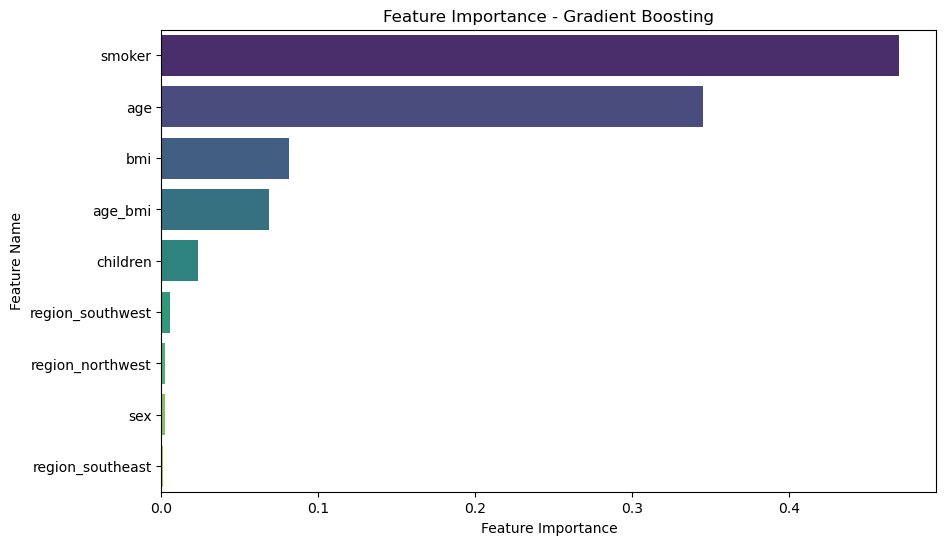

In [6]:
# Feature Importance Plot for best model
best_model_name = "Gradient Boosting"  
best_model = gb  

if hasattr(best_model, "feature_importances_"):
    feature_importances = best_model.feature_importances_
    feature_names = X.columns

    # Create DataFrame for sorting
    feat_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": feature_importances
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feat_df, x="Importance", y="Feature", palette="viridis", hue="Feature", dodge=False, legend=False)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Name")
    plt.title(f"Feature Importance - {best_model_name}")
    plt.show()



### Feature Interpretation – Gradient Boosting Regressor

Gradient Boosting, the best-performing model, revealed a similar feature importance profile:

- **Smoker:** Again, the strongest predictor, highlighting the severe cost implications of smoking.
- **Age:** Older age continues to contribute significantly to higher predicted charges.
- **BMI:** Reflects the health-related financial burden of higher body mass.
- **Age_BMI:** This interaction remains important, showing Gradient Boosting can leverage complex relationships effectively.
- **Geographic Region and Sex:** These features had minimal influence, suggesting uniform healthcare cost structures or coverage across demographics.

**Insight:** Gradient Boosting not only confirms the patterns seen in Random Forest but does so with higher accuracy, making it a reliable tool for understanding cost-driving factors.



## Storytelling, Conclusion, and Impact

### Storytelling: A Human Lens on the Data

Imagine two people applying for insurance: one is young, healthy, and doesn’t smoke. The other is older, a smoker, and overweight. Although they might seem similar on paper, the difference in their predicted charges can be thousands of dollars—because of the risk factors embedded in their health profile.

This project is about more than just numbers. It reveals how individual decisions and demographics interact to drive real financial outcomes in healthcare.

### Key Conclusions
- **Best Model**: Gradient Boosting had the lowest error and highest R², making it the best-performing model.
- **Top Features**: Smoking status, age, and BMI had the highest predictive power.
- **Data Prep Matters**: Handling outliers, scaling, and encoding made a noticeable difference in model accuracy.
- **Feature Engineering**: The `age_bmi` interaction helped uncover compounding effects on charges.

### Real-World Impact
- **For insurers**: Models like these can support fairer, risk-adjusted pricing.
- **For policymakers**: Highlights the economic cost of preventable health risks like smoking and obesity.
- **For data science**: Shows how machine learning can enhance transparency and efficiency in healthcare economics.

---

This notebook represents a full pipeline: from data wrangling to predictive modeling, to actionable insight.
